## IMD0033 - Probabilidade

# Trabalho I 

Este trabalho servirá como avaliação dos conteúdos relacionados a Estatística Descritiva.

Data de entrega: Até 23:59 do dia 10/09

Forma de entrega: Via SIGAA na forma de um jupyter notebook.

### Questão 1 (2 pontos)

Defina com suas palavras e de forma sucinta os termos abaixo:

a) (0,25 pontos) População

Resposta: Todos os dados disponíveis para análise

b) (0,25 pontos) Amostra

Resposta: Parte do população que será usada nos cálculos.

c) (0,25 pontos) Conceito (em um desenho experimental)

Resposta: Objetivo alvo que não pode ser representado diretamente em formatos de dados.

d) (0,25 pontos) Definição operacional

Resposta: Dado(s) relacionado(s) ao conceito que podem representar o objeto alvo na análise.

e) (0,25 pontos) Desvio

Resposta: É um tipo de medida calculado com base na média das diferenças de determinados pontos dos seus dados, por exemplo, os pontos dos quatis ou da amostra.

f) (0,25 pontos) Medidas de tendência central

Resposta: São medidas que tentam mostrar a distribuição dos dados, nesse caso, como os dados estão acumulados.

g) (0,25 pontos) Medidas de dispersão

Resposta: São como as medidas de dispersão, mas tentam mostrar como seus dados estão acumulados.

h) (0,25 pontos) Outlier

Resposta: Pontos extremos do dados, em que há poucos dados e o desvio dos pontos centrais até eles é muito alto.

### Questão 2 (2 pontos)

Reflita sobre as seguintes afirmações, indique se é verdadeiro ou falso e justifique:

a) (0,5 pontos) Se a variância de um conjunto de dados é 0,1, podemos certamente afirmar que os dados encontram-se muito dispersos da média.

Resposta: Não, isso depende da aplicação. Quando maior a variância mais dispersos estão os dados e, no geral, uma variância de 0,1 indicar que os dados não estão muito dispersos. 

b) (0,5 pontos) A covariância é a média do quadrado dos desvios.

Resposta: Não.

c) (0,5 pontos) Quando transformamos os dados através do z-score, a distribuição dos dados se torna uma normal.

Resposta: Sim.

d) (0,5 pontos) Ao analisar a correlação entre duas variáveis, se verificarmos uma correlação de 0.9, o que é considerada alta, não podemos afirmar que a variável independente seja a causa da variável dependente.

Resposta: Não, uma correlação alta indica que  variável independente é a causa da variável dependente.

### Questão 3 (3 pontos)

Nesta questão, considere o arquivo [CO2_emission.txt](CO2_emission.txt). Este arquivo contém dados de emissão de CO2 em kT (quilotonelada) emitido pelos países ao longo no período de 2000 a 2014. Desconsiderando aqueles países que apresentam valores faltantes (".."), responda:

a) (0,5 pontos) Qual foi o país que menos emitiu CO2 ao longo destes anos?

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('CO2_emission.txt', sep='\t', index_col='Country Name', na_values='..')
df = df.loc[:'Zimbabwe', '2000 [YR2000]':].dropna()
df.columns = [c.split()[0] for c in df.columns]
srsum = df.sum(axis = 1) 
srsum.idxmin()

'Tuvalu'

O país que menos emitiu CO2 na atmosfera foi Tuvalu.

b) (1 ponto) Qual foi o país que teve a menor média da taxa de emissão de CO2 ao longo destes anos? Considere a taxa de emissão de CO2 como sendo a razão entre a quantidade de CO2 emitido em um ano com o emitido no ano anterior.

In [3]:
columns = df.columns
srtaxas = pd.Series((0 for _ in range(len(df))))
srtaxas.index = df.index
for irow, row in df.iterrows():
    harm_sum = 1/row[df.columns[0]]
    lastcolumn = df.columns[0]
    for column in df.columns[1:-1]:
        harm_sum += 1 / (row[column] / row[lastcolumn])
        lastcolumn = column
    srtaxas.loc[irow] = (len(df.columns)-1) / harm_sum
srtaxas.idxmin()

'Aruba'

O país que teve a menor média da taxa de emissão de CO2 ao longo destes anos foi Aruba.

c) (0,5 pontos) Qual posição o Brasil ocupa no rank dos países que mais emitiram CO2 ao longo destes anos?

In [4]:
srrank = srsum.sort_values(ascending=False)
str(srrank.index.get_loc('Brazil') + 1) + 'ª posição' 

'16ª posição'

O Brasil ocupa a 16ª posição no rank dos países que mais emitiram CO2 ao longo destes anos.

d) (1 ponto) A Noruega é um dos países que vem fazendo esforço para diminuir a emissão de CO2. Abaixo se encontra o gráfico que demonstra a quantidade de CO2 emitido por este país ao longo do período apresentado pelos dados. Tendo em mente este padrão de emissão de CO2 da Noruega, qual o país que possui um padrão de emissão de CO2 mais similar ao padrão da Noruega? Plote um gráfico que consiga demonstrar a semelhança dos padrões de emissão de CO2 entre os dois países. Plote também no mesmo gráfico o padrão de emissão de CO2 do país que seja menos similar ao padrão da Noruega.

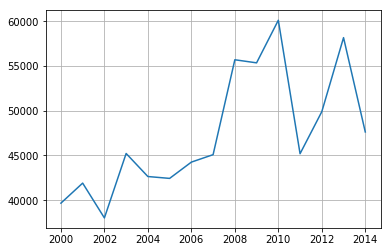

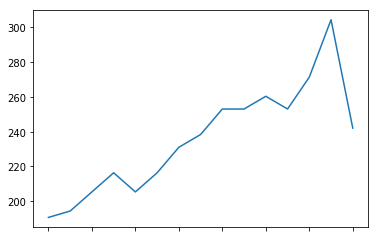

In [6]:
country = df.T.corr()['Norway'].nlargest(2).index[1]
df.loc[country].plot.line()

### Questão 4 (3 pontos)

Considere nesta questão o arquivo de dados [wdbc.data](wdbc.data). Estes dados contém algumas medidas de células tumorais de mama. Uma breve descrição das colunas podem ser obtidas a partir do arquivo [wdbc.names](wdbc.names). As amostras de células tumorais contidas nesta tabela foram classificadas em benigno (B) ou maligno (M). Diante disso pede-se:

a) (0,75 pontos) Indique a variável numérica que apresenta a maior variação (ou dispersão).

In [38]:
df = pd.read_csv('wdbc.data', header=None)
dfnum = df.iloc[:, 2:]
dfnum.var().idxmax()

25

b) (0,75 pontos) Para cada grupo de amostras (tumor benigno/maligno), calcule a média e o desvio padrão de cada uma das variáveis numéricas.

c) (0,75 pontos) Plote um gráfico de forma que você consiga visualizar os valores de medidas calculadas no item anterior.

d) (0,75 pontos) O interesse deste trabalho é verificar se algumas destas variáveis podem ajudar na classificação de novas amostras tumorais em benigno ou maligno. Com base no gráfico que você gerou no item anterior, sugira uma medida que seja importante na distinção entre o tumor benigno e maligno.